# Measure, write, read and plot P3D from sim

At PIC you need to use the lace_fake environment (we need to use fake_spectra)

In [1]:
import pickle
import fake_spectra.griddedspectra as grid_spec
from lace.setup_simulations import read_genic
from lace_fake import measure_flux_power

### Compute P3D from skewers (it will take a few minutes)

In [2]:
# path to simulation directory
#basedir='/data/desi/common/HydroData/Emulator/postprocess/Australia20/'
basedir='/data/desi/common/HydroData/Emulator/test_australia/Australia20/'
#basedir='/global/cfs/cdirs/desi/users/font/test_lace/'
simdir=basedir+'/sim_pair_0/sim_plus/'
skewers_dir=simdir+'/skewers/'

In [3]:
# open Gen-IC file to get box size
genic_file=simdir+'/paramfile.genic'
L_Mpc=read_genic.L_Mpc_from_paramfile(genic_file,verbose=True)
print('L_Mpc=',L_Mpc)

successfully read healthy configuration file
in L_Mpc, 45225.0 0.67 67.5
L_Mpc= 67.5


In [4]:
snap_num=9
# specify file to read
#sk_file='skewers_{}_Ns500_wM0.05_sT1.0_sg1.0.hdf5'.format(snap_num)
sk_file='skewers_{}_Ns128_wM0.08_sT1.0_sg1.0.hdf5'.format(snap_num)
# read file storing pre-computed skewers
skewers=grid_spec.GriddedSpectra(snap_num, simdir+'/output/',
                savedir=skewers_dir, savefile=sk_file, reload_file=False)

Reading pre-computed spectra (from file /data/desi/common/HydroData/Emulator/test_australia/Australia20//sim_pair_0/sim_plus//skewers/skewers_9_Ns128_wM0.08_sT1.0_sg1.0.hdf5  )
16384  sightlines. resolution:  5.6081606986464365  z= 2.2500000000000004


In [5]:
p3d=measure_flux_power.measure_p3d_Mpc(skewers,scale_tau=1.0,L_Mpc=L_Mpc,
                                       n_k_bins=20,k_Mpc_max=20.0,n_mu_bins=16)

n_xy=128, n_z=843
Tue Nov  8 13:18:50 2022 got box geometry
Tue Nov  8 13:18:51 2022 got Fourier modes
Tue Nov  8 13:18:55 2022 got binned power
Tue Nov  8 13:18:56 2022 got bin counts
Tue Nov  8 13:18:56 2022 got binned k
Tue Nov  8 13:18:57 2022 got binned mu


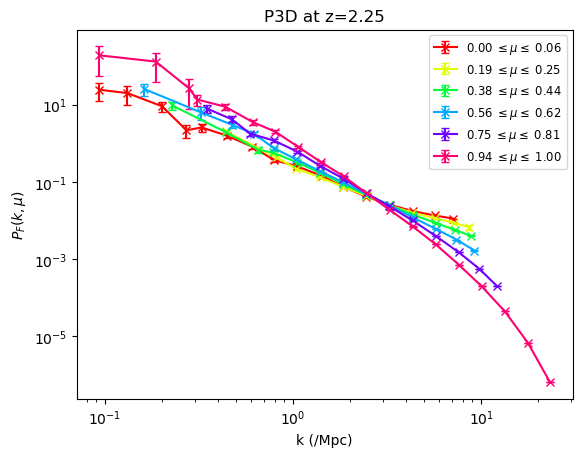

In [6]:
measure_flux_power.plot_p3d(p3d)

In [7]:
if False:
    fname='test_p3d.p'
    pickle.dump(p3d,open(fname,"wb"))
    test_p3d=pickle.load(open(fname,"rb"))
    measure_flux_power.plot_p3d(test_p3d)